# Electric Machinery Fundamentals 5th edition
## Chapter 6 (Code examples)

## Example 6-5 (d) - for generator and motor

**Creates a plot of the torque-speed curve of the induction motor as depicted in Figure 6-62.**

**Note:** *You should first click on "`Cell` &rarr; `Run All`" in order that the plots get generated.*

Import the PyLab namespace (provides set of useful commands and constants like Pi)

In [1]:
%pylab inline
%config InlineBackend.figure_formats={'svg',}  # use high quality SVG instead of PNGs

Populating the interactive namespace from numpy and matplotlib


First, initialize the values needed in this program.

In [2]:
r1 =  0.641                # Stator resistance
x1 =  1.106                # Stator reactance
r2 =  0.332                # Rotor resistance
x2 =  0.464                # Rotor reactance
xm = 26.3                  # Magnetization branch reactance
v_phase =  460 / sqrt(3)   # Phase voltage
n_sync  = 1800             # Synchronous speed (r/min)
w_sync  = n_sync * 2*pi/60 # Synchronous speed (rad/s)

Calculate the Thevenin voltage and impedance from Equations 7-41a:

$$ V_{TH} =  V_\phi \frac{X_M}{\sqrt{R_1^2 + (X_1 + X_M)^2}} $$

and 7-43:

$$ Z_{TH} = \frac{jX_m (R_1 + jX_1)}{R_1 + j(X_1 + X_M)} $$

In [3]:
v_th = v_phase * ( xm / sqrt(r1**2 + (x1 + xm)**2) )
z_th = ((1j*xm) * (r1 + 1j*x1)) / (r1 + 1j*(x1 + xm))
r_th = real(z_th)
x_th = imag(z_th)

Now calculate the torque-speed characteristic for many slips between -1 and 1.  

In [4]:
s = linspace(-1, 1, 100)  # slip
nm = (1 - s) * n_sync     # mechanical speed

Calculate torque for original rotor resistance using:

$$ \tau_\text{ind} = \frac{3 V_{TH}^2 R_2 / s}{\omega_\text{sync}[(R_{TH} + R_2/s)^2 + (X_{TH} + X_2)^2]} $$

In [5]:
t_ind1 = ((3 * v_th**2 * r2/s) /
          (w_sync * ((r_th + r2/s)**2 + (x_th + x2)**2)))

Calculate torque for triple rotor resistance:

In [6]:
t_ind2 = ((3 * v_th**2 * 3*r2/s) /
          (w_sync * ((r_th + 3*r2/s)**2 + (x_th + x2)**2)))

Plot the torque-speed curve:

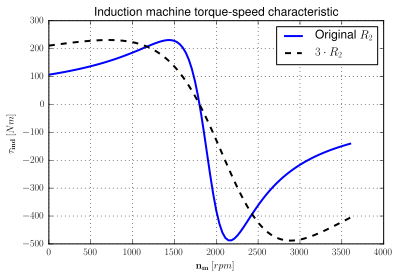

In [7]:
rc('text', usetex=True)   # enable LaTeX commands for plot
plot(nm, t_ind1,'b',
     nm, t_ind2,'k--',
     lw=2)
xlabel(r'$\mathbf{n_{m}}\ [rpm]$')
ylabel(r'$\mathbf{\tau_{ind}}\ [Nm]$')
title ('Induction machine torque-speed characteristic')
legend (('Original $R_{2}$', '$3 \cdot R_{2}$',), loc = 1);
grid()